In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as im
import copy

# VIDEO: Examples of Fourier transform applications

### Important note: You are not expected to understand this code now. That's the point of the course!
#### The point is simply to marvel at the strange beauty of the Fourier transform

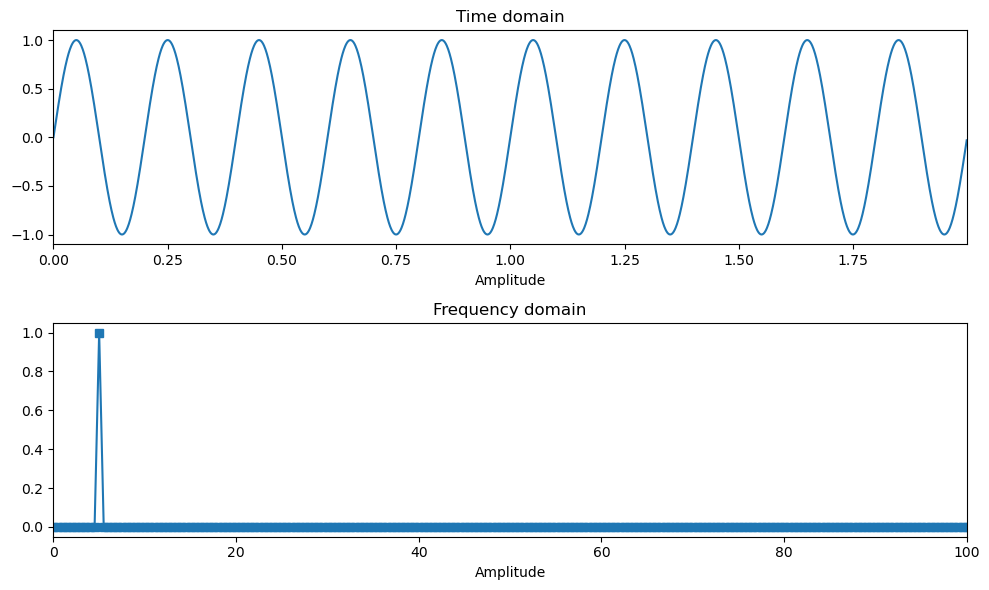

In [2]:
# 1D Examples

srate = 1000
time  = np.arange(0,2,1/srate)
n     = len(time)
hz    = np.linspace(0,srate,n)

### pure sine wave
signal = np.sin(2*np.pi*5*time)

# ### multispectral wave
# signal = 2*np.sin(2*np.pi*5*time) + 3*np.sin(2*np.pi*7*time) + 6*np.sin(2*np.pi*14*time)

# ### white noise
# signal = np.random.randn(n)

# ### Brownian noise (aka random walk)
# signal = np.cumsum(np.random.randn(n))

# ### 1/f noise
# ps   = np.exp(1j*2*np.pi*np.random.rand(int(n/2))) * .1+np.exp(-(np.arange(int(n/2)))/50)
# ps   = np.concatenate((ps,ps[::-1]))
# signal = np.real(np.fft.ifft(ps)) * n

# ### square wave
# signal = np.zeros(n)
# signal[np.sin(2*np.pi*3*time)>.9] = 1

# ### AM (amplitude modulation)
# signal = 10*np.interp(np.linspace(1,10,n),np.linspace(1,10,10),np.random.rand(10)) * np.sin(2*np.pi*40*time)

# ### FM (frequency modulation)
# freqmod = 20*np.interp(np.linspace(1,10,n),np.linspace(1,10,10),np.random.rand(10))
# signal  = np.sin( 2*np.pi * ((10*time + np.cumsum(freqmod))/srate) )

# ### filtered noise
# signal = np.random.randn(n)     # start with noise
# s  = 5*(2*np.pi-1)/(4*np.pi)    # normalized width
# fx = np.exp(-.5*((hz-10)/s)**2) # gaussian
# fx = fx/np.max(fx)              # gain-normalize
# signal = 20*np.real( np.fft.ifft( np.fft.fft(signal)**fx) )



# compute amplitude spectrum
ampl = 2*np.abs(np.fft.fft(signal)/n)


## visualize!
fig,ax = plt.subplots(2,1,figsize=(10,6))
ax[0].plot(time,signal)
ax[0].set_xlabel('Time (sec.)')
ax[0].set_xlabel('Amplitude')
ax[0].set_title('Time domain')
ax[0].set_xlim(time[[0,-1]])

ax[1].plot(hz,ampl,'s-')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_xlabel('Amplitude')
ax[1].set_title('Frequency domain')
ax[1].set_xlim([0,100])

plt.tight_layout()
plt.show()

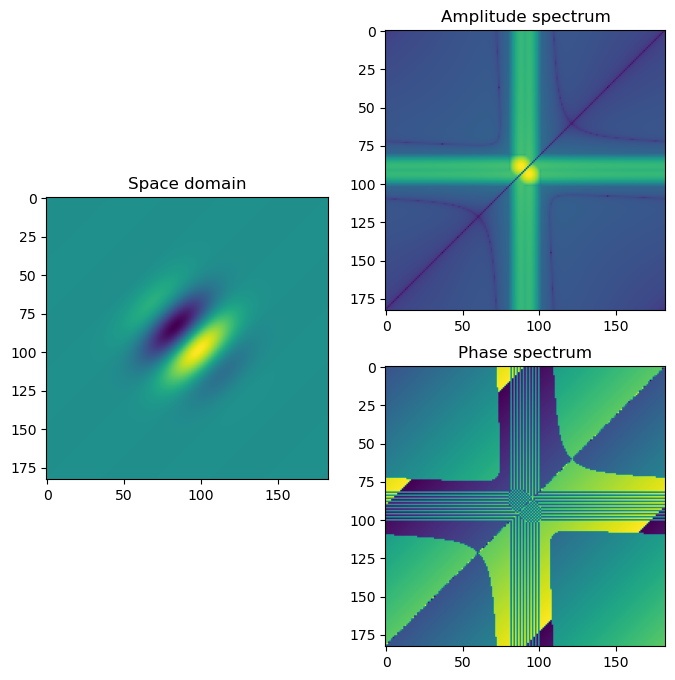

In [3]:
## 2D examples


### gabor patch
width = 20      # width of gaussian
sphs  = np.pi/4 # sine phase
lims = np.arange(-91,92)
y,x  = np.meshgrid(lims,lims)
xp   = x*np.cos(sphs) + y*np.sin(sphs)
yp   = y*np.cos(sphs) - x*np.sin(sphs)
gaus2d = np.exp(-(xp**2 + yp**2) / (2*width**2))
sine2d = np.sin( 2*np.pi*.02*xp )
img    = sine2d * gaus2d


# ### white noise
# img = np.random.randn(len(img),len(img))


# ### portrait
# lenna = im.imread('Lenna.png')
# img   = np.mean(lenna,axis=2)


# ### low-pass filtered Lenna
# width = .1    # width of gaussian (normalized Z units)
# meshx = np.linspace(-2,2,img.shape[0])
# y,x   = np.meshgrid(meshx,meshx)
# gaus2d= np.exp(-(x**2 + y**2) / (2*width**2)) # add 1- at beginning to invert filter
# imgX  = np.fft.fftshift(np.fft.fft2(img))
# img   = np.real(np.fft.ifft2(np.fft.fftshift(imgX*gaus2d)))


# ### high-pass filtered Lenna
# width = .3  # width of gaussian (normalized Z units)
# meshx = np.linspace(-2,2,img.shape[0])
# y,x   = np.meshgrid(meshx,meshx)
# gaus2d= 1-np.exp(-(x**2 + y**2) / (2*width**2))
# imgX  = np.fft.fftshift(np.fft.fft2(img))
# img   = np.real(np.fft.ifft2(np.fft.fftshift(imgX*gaus2d)))


# ## phase-scrambled Lenna
# imgX   = np.fft.fftshift(np.fft.fft2(imgL))
# powr2  = np.abs(imgX)
# phas2  = np.angle(imgX)
# ridx   = np.random.choice(len(phas2)**2,size=len(phas2)**2) # randomization index
# rphas2 = np.reshape(phas2[np.unravel_index(ridx,phas2.shape)],phas2.shape) # random phases
# img    = np.real(np.fft.ifft2(np.fft.fftshift(powr2*np.exp(1j*rphas2))))





# power and phase spectra
imgX  = np.fft.fftshift(np.fft.fft2(img))
powr2 = np.log(np.abs(imgX))
phas2 = np.angle(imgX)



## show the results!
fig = plt.figure(figsize=(8,8))
gs  = fig.add_gridspec(2,2)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])

ax1.imshow(img)
ax1.set_title('Space domain')

ax2.imshow(powr2)
ax2.set_title('Amplitude spectrum')

ax3.imshow(phas2)
ax3.set_title('Phase spectrum')

plt.show()